In [54]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# load data into a Pandas DataFrame
df = pd.read_csv('simplified_data.csv') 
df = df.drop(['Unnamed: 0'], axis=1)
df.head()
print(df.shape)

(1353, 19)


In [56]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   estado_vital                 1353 non-null   float64
 1   edad                         1353 non-null   float64
 2   sexo                         1353 non-null   float64
 3   peso                         1353 non-null   float64
 4   hipertension_arterial        1353 non-null   float64
 5   diabetes_mellitus            1353 non-null   float64
 6   tabaquismo                   1353 non-null   float64
 7   frecuencia_cardiaca          1353 non-null   float64
 8   presion_arterial_sistolica   1353 non-null   float64
 9   presion_arterial_diastolica  1353 non-null   float64
 10  hb                           1353 non-null   float64
 11  creatinina                   1353 non-null   float64
 12  ckmb                         1353 non-null   float64
 13  fibrilacion_auricu

,estado_vital,edad,sexo,peso,hipertension_arterial,diabetes_mellitus,tabaquismo,frecuencia_cardiaca,presion_arterial_sistolica,presion_arterial_diastolica,hb,creatinina,ckmb,fibrilacion_auricular,insuficiencia_renal_cronica,ieca,furosemida,otros_diureticos,clopidogrel
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.101996,66.220990,0.678492,73.026608,0.849224,0.294900,0.478197,84.853659,125.937177,74.700665,127.637103,103.455285,154.460584,0.015521,0.032520,0.872136,0.182557,0.515152,0.961567
std,0.302754,12.655743,0.467228,11.982885,0.357963,0.456167,0.499709,14.946676,22.987900,14.060935,25.702221,59.439608,92.668129,0.123659,0.177443,0.334062,0.386446,0.499955,0.192311
min,0.000000,13.000000,0.000000,40.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,8.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,65.000000,1.000000,0.000000,0.000000,78.000000,120.000000,70.000000,127.000000,78.000000,95.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,67.000000,1.000000,72.000000,1.000000,0.000000,0.000000,86.000000,130.000000,70.000000,133.000000,89.000000,171.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,0.000000,75.000000,1.000000,80.000000,1.000000,1.000000,1.000000,88.000000,130.000000,80.000000,135.000000,113.000000,184.700000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,98.000000,1.000000,150.000000,1.000000,1.000000,1.000000,180.000000,240.000000,130.000000,238.000000,1036.000000,960.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for systolic and diastolic blood pressure, are unrealistic. This suggests the presence of outliers in the data.

In [57]:
# check distribution of target variable
df.estado_vital.value_counts()

0.0    1215
1.0     138
Name: estado_vital, dtype: int64

1215 out of 1353 cases in this dataset are labelled alive, and 138 cases are labelled dead. This suggests that the dataset is not balanced. We will need to take this into account when we split the dataset into training and test sets.

<Axes: >

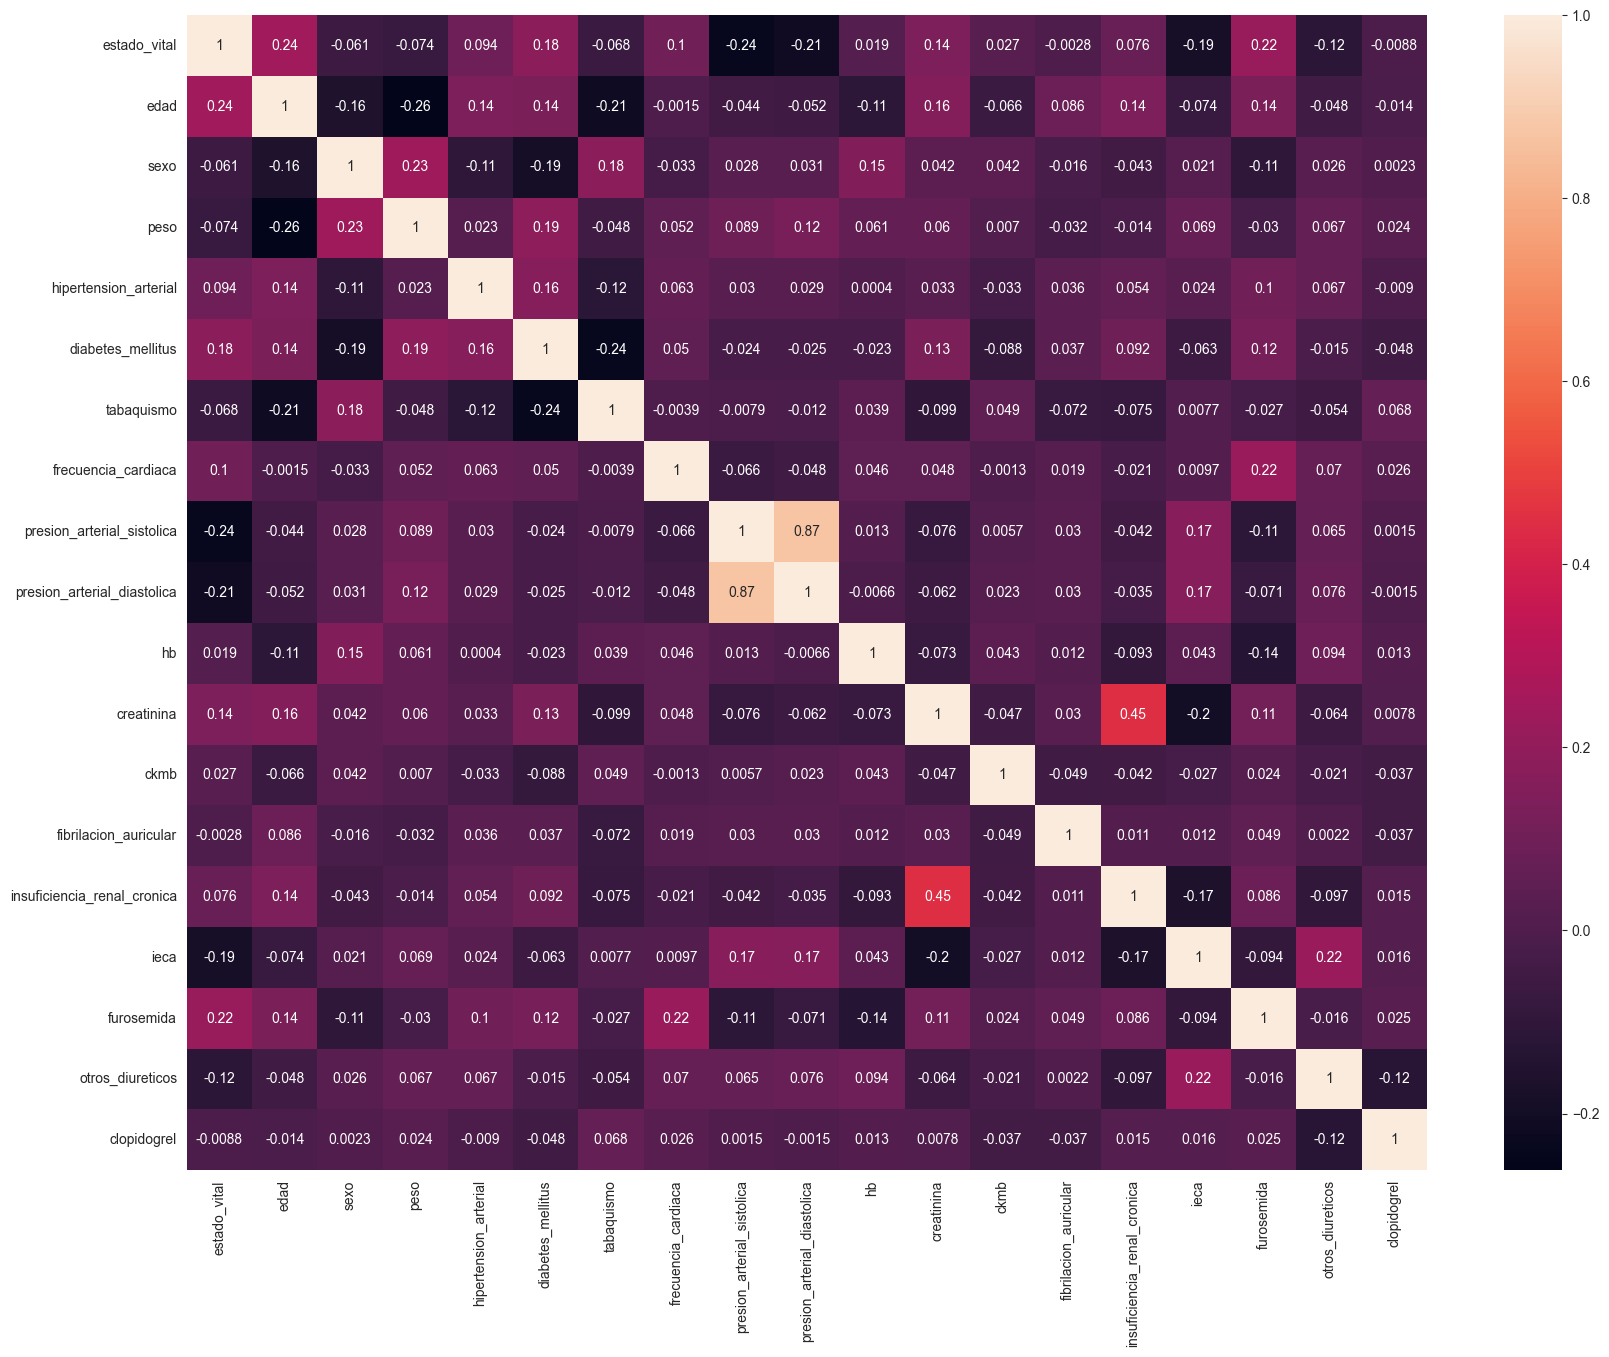

In [58]:
# check correlations
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

A heatmap shows correlations between variables in the dataset. From the above heatmap, we see that no features directly correlate with the label (estado_vital) and that generally, there do not exist significant correlations between other variables. However, correlations exist between two variables:
- Creatinina and insufuciencia_renal_crónica are correlated with a score of 0.45.

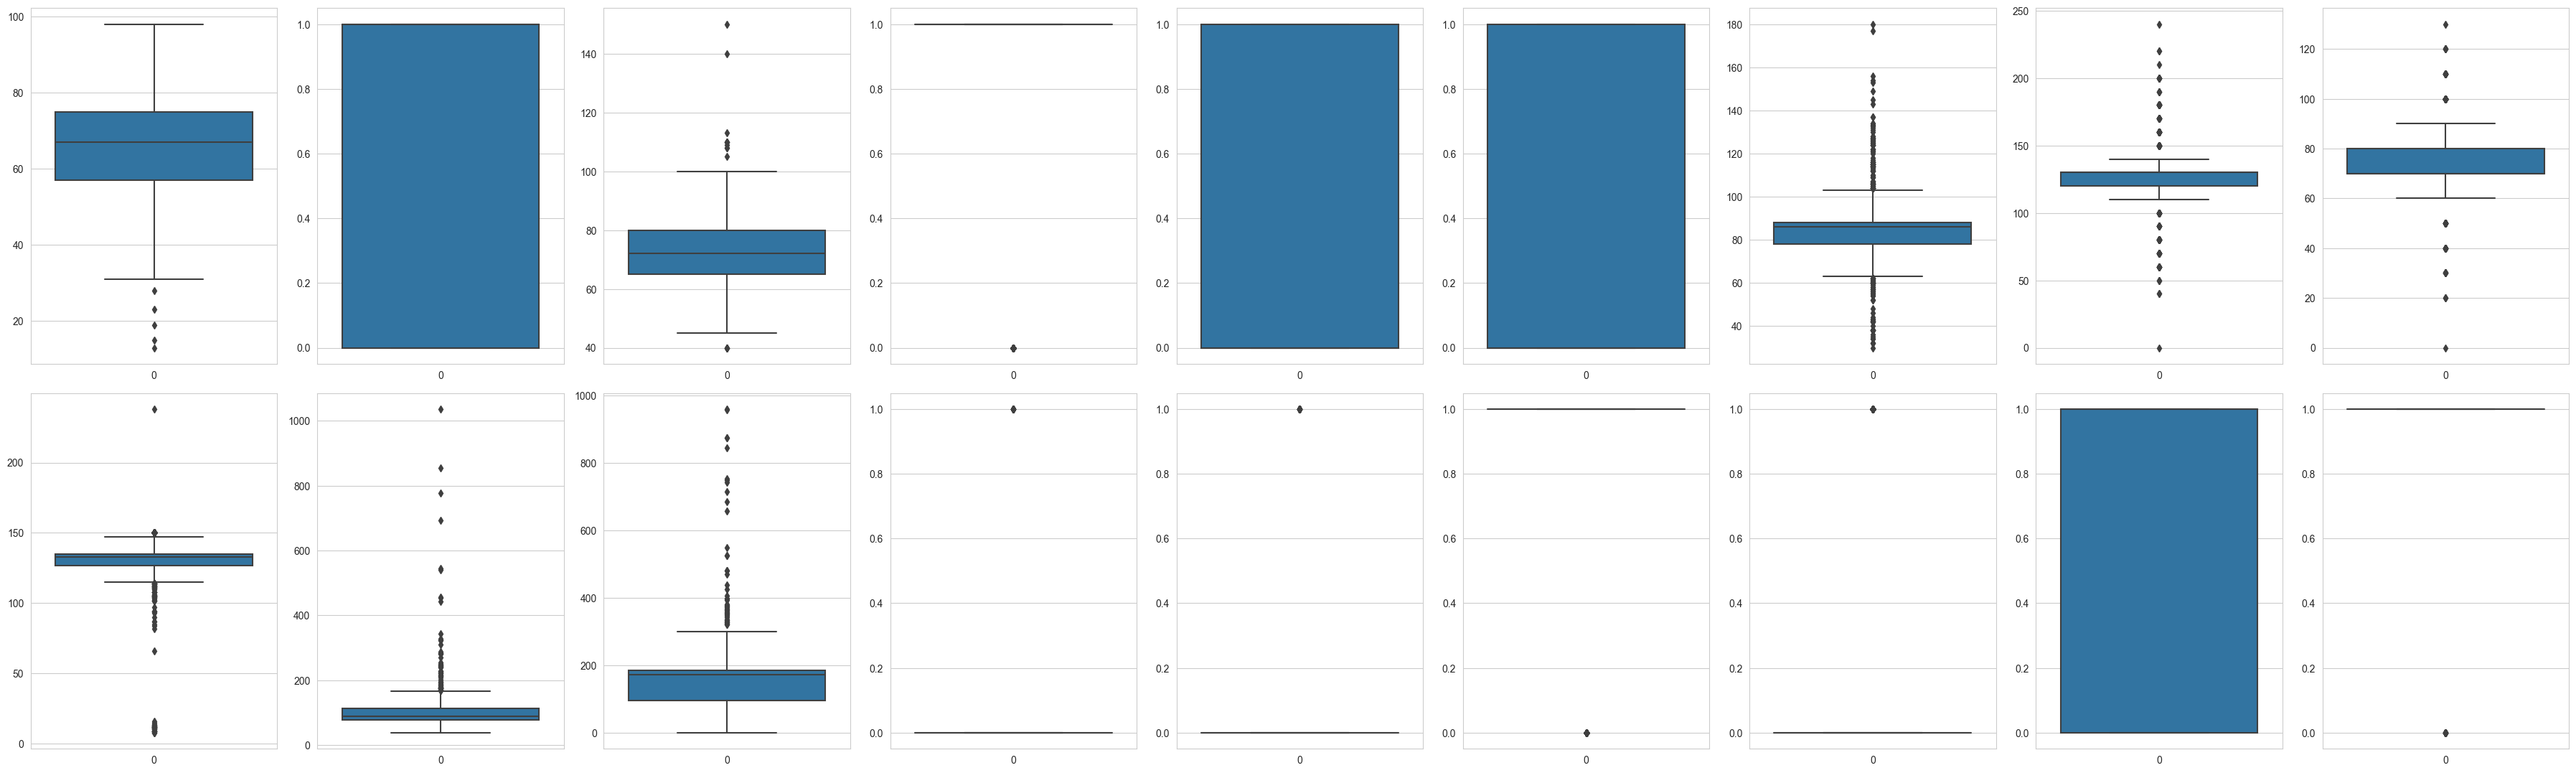

In [59]:
# check outliers

def check_outliers(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows + 1,int(number_of_columns),i)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],orient='v')
        plt.tight_layout()
        
check_outliers(df)

The above boxplots confirm our suspicion that there are outliers in the dataset. There appear to be several outliers in the systolic and diastolic variables. These outliers might be explained by human error when entering data into the .csv format. Our prediction model might benefit if these outliers were removed from the data.

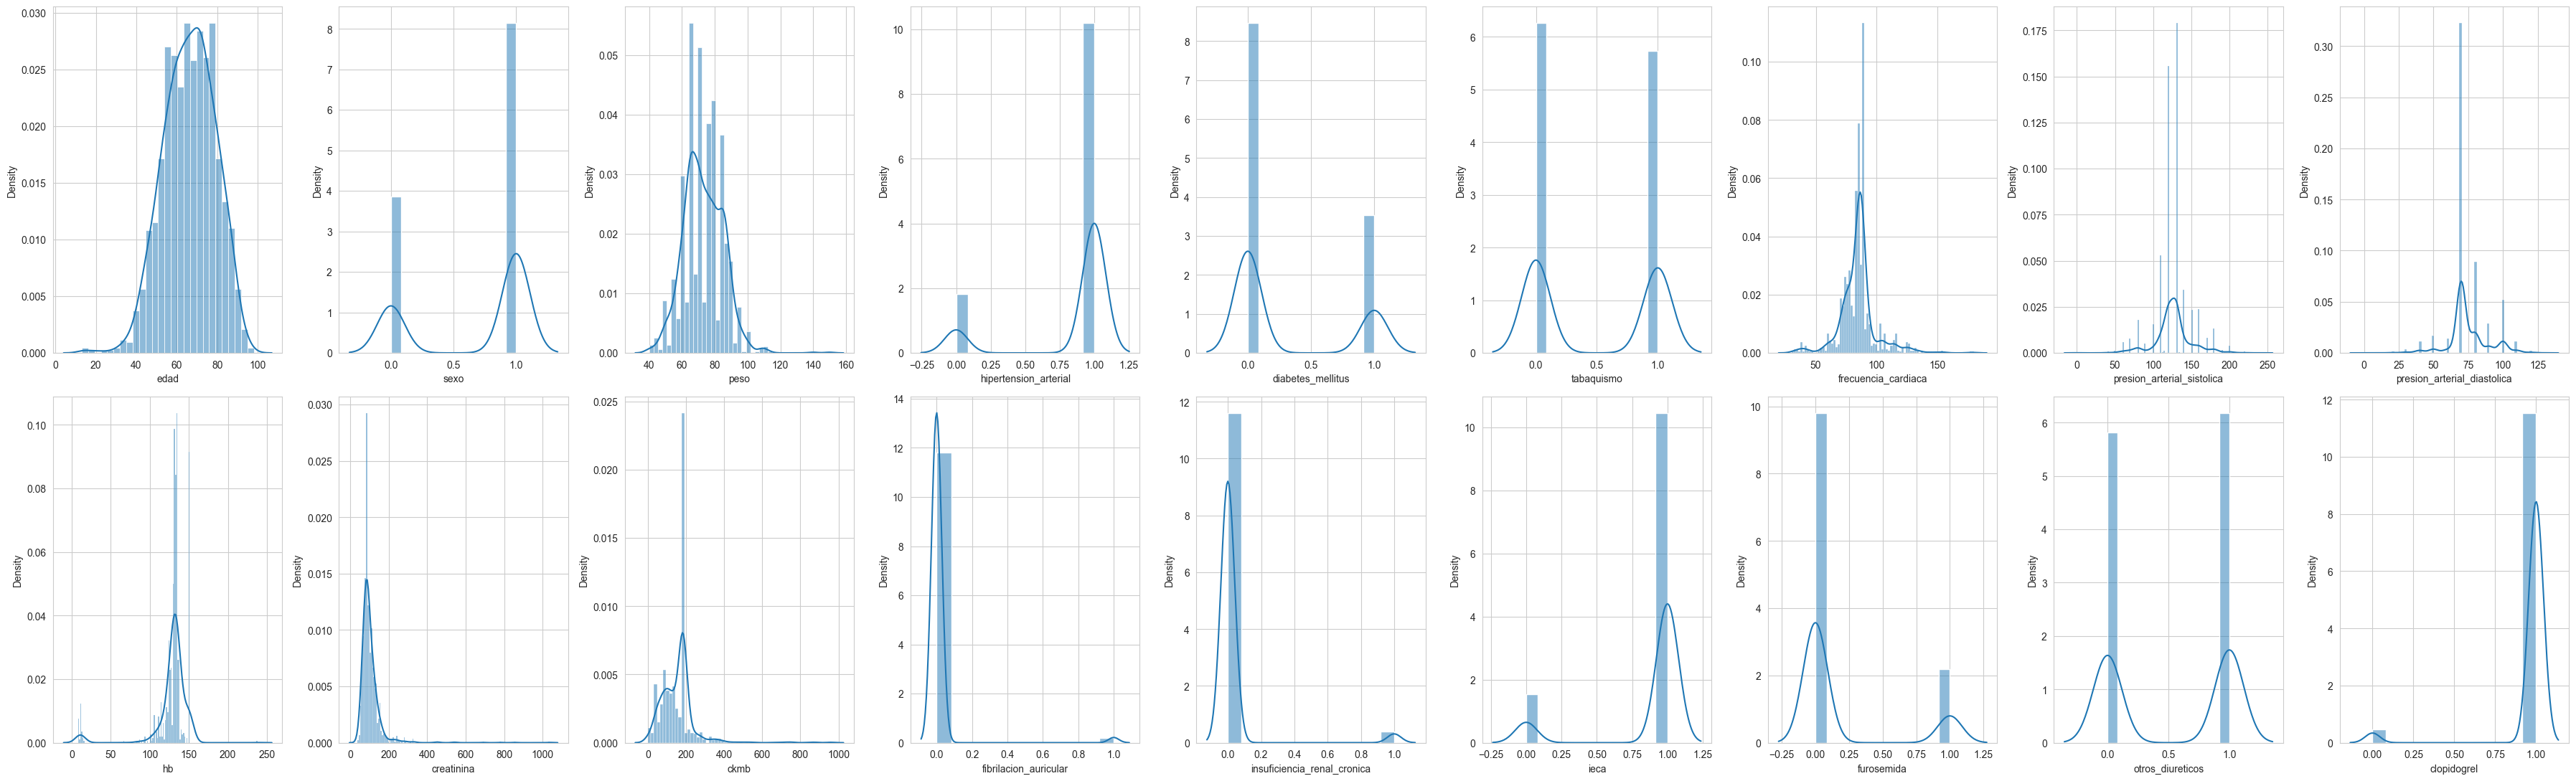

In [60]:
# check distribution and skew
def check_dist(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows+1,int(number_of_columns),i)
        sns.histplot(df[l[i]],kde=True,stat='density', kde_kws=dict(cut=3)) 
        plt.tight_layout()
        
check_dist(df)

Histograms show the distribution of each feature in the dataset. There appears to be some variation in weight, but edad, frecuencia cardiaca and creatinina are roughly normally distributed. However, the histograms further suggest the presence of outliers in the blood pressure features. Moreover, there exist categorical features in the dataset, such as sexo, hipertension_arterial, diabetes_mellitus, tabaquismo, fibricación auricular, insuficiencia renal cronica, ieca, furosemida, otros diureticos y clopidogrel.

Note that we are dealing with a mix of continuous, ordinal, and binary data, as confirmed from the above data analysis. We can combine all of these data types in one model. Here are a few typical steps we took to preprocess this data before modeling.

- Standardize all continuous features: All continuous input should be standardized. For every continuous feature, compute its mean (𝜇) and standard deviation (𝜎) and calculate 𝑥 = (𝑥−𝜇) / 𝜎.
- Binarize categorical/discrete features (create dummy variables): For all categorical features, represent them as multiple boolean features. For example, instead of having one feature called cholesterol, have 3 boolean features - chol_normal, chol_above_normal, chol_well_above_normal and appropriately set these features to 0 or 1. As can be seen, for every categorical feature, k binary features are added, where k is the number of values that the categorical feature takes.

In [61]:
cont_cols = ['edad','peso','presion_arterial_sistolica','presion_arterial_diastolica','frecuencia_cardiaca','hb','creatinina','ckmb']
bin_cols = ['estado_vital','sexo','hipertension_arterial','diabetes_mellitus','tabaquismo','fibrilacion_auricular','insuficiencia_renal_cronica','ieca','furosemida','otros_diureticos','clopidogrel']

# create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# create an object to transform the data to fit minmax processor
df_scaled = min_max_scaler.fit_transform(df[cont_cols])

# run the normalizer on the dataframe
df_normalized = pd.DataFrame(df_scaled)
df_normalized.columns = cont_cols
df_normalized.head()

,edad,peso,presion_arterial_sistolica,presion_arterial_diastolica,frecuencia_cardiaca,hb,creatinina,ckmb
0,0.000000,0.409091,0.500000,0.538462,0.200000,0.556522,0.032064,0.384375
1,0.023529,0.154545,0.500000,0.538462,0.433333,0.526087,0.067134,0.151042
2,0.070588,0.227273,0.500000,0.615385,0.246667,0.434783,0.023046,0.192396
3,0.117647,0.272727,0.500000,0.538462,0.386667,0.543478,0.043086,0.194792
4,0.176471,0.318182,0.666667,0.769231,0.313333,0.552174,0.036072,0.192396


In [62]:
df_normalized = pd.concat([df_normalized, df[bin_cols]], axis=1)

df_normalized.head()

,edad,peso,presion_arterial_sistolica,presion_arterial_diastolica,frecuencia_cardiaca,hb,creatinina,ckmb,estado_vital,sexo,hipertension_arterial,diabetes_mellitus,tabaquismo,fibrilacion_auricular,insuficiencia_renal_cronica,ieca,furosemida,otros_diureticos,clopidogrel
0,0.000000,0.409091,0.500000,0.538462,0.200000,0.556522,0.032064,0.384375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.023529,0.154545,0.500000,0.538462,0.433333,0.526087,0.067134,0.151042,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.070588,0.227273,0.500000,0.615385,0.246667,0.434783,0.023046,0.192396,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.117647,0.272727,0.500000,0.538462,0.386667,0.543478,0.043086,0.194792,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.176471,0.318182,0.666667,0.769231,0.313333,0.552174,0.036072,0.192396,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [63]:
# save this cleaned data
df_normalized.to_csv('data_cleaned.csv', index=False)

# Support Vector Machine (SVM) classifier

In [141]:
# try an SVM Classifier
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

df_normalized= df_normalized.dropna()
print(df_normalized.shape)
X = df_normalized.drop('estado_vital', axis=1)
y = df_normalized['estado_vital']
# class wights
class_weight = {0: 1, 1: len(y) / sum(y)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5) # 80% training and 20% test

(1353, 19)


In [142]:
# create a svm classifier
clf = svm.SVC(kernel='rbf',class_weight=class_weight) # rbf kernel
# train the model using the training sets
clf.fit(X_train, y_train)

SVC(class_weight={0: 1, 1: 9.804347826086957})

In [143]:
# evaluate the model
def evaluate_model(clf, X_test, y_test):

    # predict the response for test dataset
    y_pred = clf.predict(X_test)

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    # precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(y_test, y_pred))

    # recall: what percentage of positive tuples are labelled as such?
    print("Recall:",metrics.recall_score(y_test, y_pred))
    
    # calc auc
#     probas = clf.predict_proba(X_test)
#     auc = roc_auc_score(testy, probs)
#     print('AUC: %.3f' % auc)

In [140]:
evaluate_model(clf, X_test, y_test)

Accuracy: 0.7527675276752768
Precision: 0.24691358024691357
Recall: 0.7692307692307693


# Random Forest classifier

In [144]:
# try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
evaluate_model(rf_clf, X_test, y_test)

# get feature importances
feature_imp = pd.Series(rf_clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.9077490774907749
Precision: 0.8181818181818182
Recall: 0.28125


frecuencia_cardiaca            0.155240
creatinina                     0.123812
edad                           0.122664
presion_arterial_sistolica     0.106265
peso                           0.089250
hb                             0.088645
ckmb                           0.077307
presion_arterial_diastolica    0.061984
furosemida                     0.031627
diabetes_mellitus              0.031584
otros_diureticos               0.027354
sexo                           0.020337
ieca                           0.020163
tabaquismo                     0.019628
insuficiencia_renal_cronica    0.008781
hipertension_arterial          0.006955
fibrilacion_auricular          0.006310
clopidogrel                    0.002096
dtype: float64

# Logistic Regression classifier

In [146]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [149]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
def lrcv(key, target_vars, df, resample=True):
    X = df.drop(target_vars[key], axis=1)
    y = df[key]
    print('\n{0}\n'.format(key))

    cols = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10) # 80% training and 20% test

    if resample:
        smote = SMOTE()
        print("Before oversampling, counts of label '1': {}".format(sum(y_train==1)))
        print("Before oversampling, counts of label '0': {} \n".format(sum(y_train==0)))
        X_train, y_train = smote.fit_sample(X_train, y_train.ravel())
        print("After oversampling, counts of label '1': {}".format(sum(y_train==1)))
        print("After oversampling, counts of label '0': {} \n".format(sum(y_train==0)))
#         plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')
        
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
#     predicted = cross_val_predict(LogisticRegression(), X, y, cv=cv)
    print('accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print(metrics.classification_report(y_test, y_pred))
    
    feature_coefs = pd.Series(clf.coef_.reshape(-1),index=cols).sort_values(ascending=False)
    print(feature_coefs)
    
    print('Confusion matrix:\n')
    cm = metrics.confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in [0,1]])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True)

    return clf


estado_vital

accuracy: 0.8819188191881919
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       236
         1.0       0.58      0.31      0.41        35

    accuracy                           0.88       271
   macro avg       0.74      0.64      0.67       271
weighted avg       0.86      0.88      0.87       271

diabetes_mellitus              1.076308
furosemida                     0.690842
hipertension_arterial          0.370472
edad                           0.044407
insuficiencia_renal_cronica    0.008427
hb                             0.003273
frecuencia_cardiaca            0.003008
creatinina                     0.001030
ckmb                           0.000992
fibrilacion_auricular         -0.001550
presion_arterial_diastolica   -0.001569
peso                          -0.025332
presion_arterial_sistolica    -0.032246
sexo                          -0.123874
clopidogrel                   -0.207629
tabaquismo                   

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


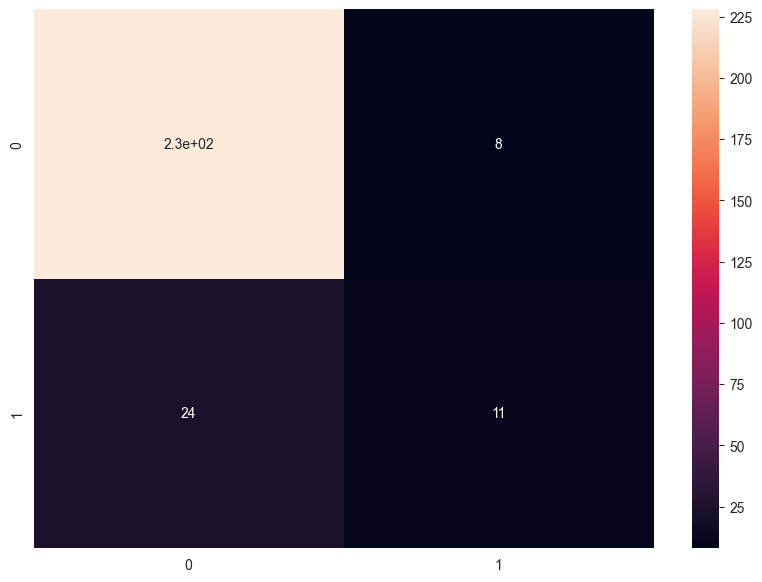

In [150]:
target_vars = {'estado_vital': ['estado_vital']}

clf = lrcv('estado_vital', target_vars, df, resample=False)

# K-Fold Cross Validation

In [164]:
from sklearn import svm
from sklearn.model_selection import *
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

def evaluate(C, X_test, y_test):
    y_pred = C.predict(X_test)
    
    k_fold = KFold(10, shuffle = False, random_state=None) #10-fold cross-validation
    cv_scores = cross_val_score(C, X_test, y_test.values.ravel(), cv = k_fold)

    print("Cross-validation score means: ", cv_scores.mean())
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    
    print(classification_report(y_test, y_pred))

In [165]:
#training SVM SVC w/rbf kernel
C = svm.SVC(gamma = 'scale') #create classifier
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.8820105820105819
Accuracy:  0.8819188191881919
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       239
         1.0       0.00      0.00      0.00        32

    accuracy                           0.88       271
   macro avg       0.44      0.50      0.47       271
weighted avg       0.78      0.88      0.83       271



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [166]:
#training Gaussian Naive Bayes classifier
C = GaussianNB()
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.3835978835978836
Accuracy:  0.7859778597785978
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       239
         1.0       0.27      0.47      0.34        32

    accuracy                           0.79       271
   macro avg       0.59      0.65      0.61       271
weighted avg       0.84      0.79      0.81       271



In [167]:
#training supervised MLP
C = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (100,))
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

Cross-validation score means:  0.8268518518518517
Accuracy:  0.8487084870848709
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       239
         1.0       0.33      0.28      0.31        32

    accuracy                           0.85       271
   macro avg       0.62      0.60      0.61       271
weighted avg       0.84      0.85      0.84       271



/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [168]:
#training KNN
C = KNeighborsClassifier(n_neighbors = 3)
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.8526455026455027
Accuracy:  0.8597785977859779
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       239
         1.0       0.31      0.16      0.21        32

    accuracy                           0.86       271
   macro avg       0.60      0.56      0.57       271
weighted avg       0.83      0.86      0.84       271



In [171]:
#training random forest classifier
C = RandomForestClassifier(n_estimators = 100)
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)

Cross-validation score means:  0.8969576719576718
Accuracy:  0.9003690036900369
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       239
         1.0       0.78      0.22      0.34        32

    accuracy                           0.90       271
   macro avg       0.84      0.61      0.64       271
weighted avg       0.89      0.90      0.87       271



In [ ]:
#Training logistic regression model
C = LogisticRegression(solver = 'lbfgs')
C.fit(X_train, y_train) #train classifier

evaluate(C, X_test, y_test)